# Logistic Regression Iris Example



Loading the dataset from CSV file using numpy

In [7]:
import numpy as np

X=np.loadtxt('iris.csv',
skiprows=1,
delimiter=",",
usecols = (0,1,2,3,4),
#comments = "%"
)

data = X
print(data.shape)
X= data[0:100,0:4]
y= data[0:100,4][np.newaxis].T
#y=y[:,np.newaxis] alaternative 
print(X.shape)
print(y.shape)

(150, 5)
(100, 4)
(100, 1)


## Displaying a scatter plot 

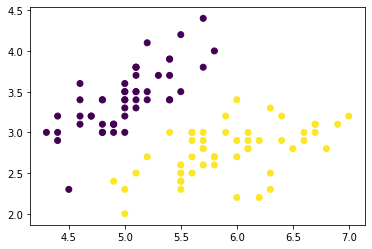

In [29]:
import matplotlib.pyplot as plt
%matplotlib inline
#plt.plot(X[:,0],X[:,1],".")
plt.scatter(X[:,0],X[:,1], c=y[:,0])

## KNN classification using Sklearn

In [6]:
from sklearn.linear_model import LogisticRegression

clf= LogisticRegression()

clf.fit(X, y)


C:\Users\Zia\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

## Prediction using logistic regression

In [70]:
X[11,:].shape

(4,)

In [71]:
X[11,:][np.newaxis]

array([[4.8, 3.4, 1.6, 0.2]])

In [72]:
X[11,:][np.newaxis].shape

(1, 4)

In [73]:
p = clf.predict(X[10,:][np.newaxis])
print(p)

q = clf.predict(np.array([6,3,5,2])[np.newaxis])

print(q)

q2 = clf.predict(np.array([[6,3,5,2]]))
print(q2)


# The first column is the probability that the entry has the -1 label
#and the second column is the probability that the entry has the +1 label.
print(clf.predict_proba(np.array([[6,3,5,2]])))



[0.]
[1.]
[1.]
[[0.00217205 0.99782795]]


In [74]:
clf.intercept_ # \theta_0

array([-0.26048137])

In [75]:
clf.coef_ # regression parameters 

array([[-0.40731745, -1.46092371,  2.24004724,  1.00841492]])

# Logistic Regression without sklearn with gradient descent 

## The sigmoid funciton:
    
$$g(z) = \frac{1}{1+e^{-z}}$$

In [31]:
# The sigmoid funciton
def sigmoid(z):
    return 1/(1+ np.exp(-z))

In [32]:
# test the sigmoid function
sigmoid(-10)

sigmoid(np.array([1,2,3,4,5,6])) #  Note the vector input and output

array([0.73105858, 0.88079708, 0.95257413, 0.98201379, 0.99330715,
       0.99752738])

## Gradient descent for logistic regression

In [33]:
#%%

# linear algebra operations require matrices 
# or columns vectors i.e. (m X 1 matrices)
# the X and Y are 1-d arrays 

m = X.shape[0] # number of samples

# create a new m X 1 column vector of 1s by using
# np.ones((m,1)) and combine it and X horizontally
# and store into Xmat. Note : np.ones() needs a tuple as input
Xmat = np.hstack((np.ones((m,1)),X))
print('Xmat:',Xmat.shape)

n = Xmat.shape[1] # number of features 

theta = np.zeros(n) # theta as an array of n elements 
theta = theta[:,np.newaxis] # add an axis to make it a n x 1 vector
print('theta',theta.shape)




Xmat: (100, 5)
theta (5, 1)


In [34]:
#%% gradient descent vectorized

# alpha is the learning rate
alpha =  0.01 # experiment with differnt learning rates

numiter = 1000 # numbe of iterations 

for i in range (1,numiter+1):
    
    # print = sign fifty times. * is string repetition operator
    # to create a separator line between iterations
    print('='*50) 
    
    print('Iteration: {} \t theta:{}'.format(i,theta))

    # find predicted y by using vectorized version
    # of the hypothesis and sigmoid function
    # Note: @ is the matrix multiplicaiton operator in python 3.5 and above 
    # Older version use ypred = np.dot(Xmat,theta)
    ypred = sigmoid(Xmat @ theta) # note Xmat, ypred and theta are metrices or vectors
    
    # calcualte adjustment 
    
    adj =(alpha/m)* Xmat.T@ (y- ypred)
    
    # multipy adj to corresponding feature and sum
    # note: this is a vectorized from without using 
    # any for loops. 
    theta = theta + adj
    
    print('='*50)


print('Theta (gradient descent):', theta)

Iteration: 1 	 theta:[[0.]
 [0.]
 [0.]
 [0.]
 [0.]]
Iteration: 2 	 theta:[[-1.21972744e-19]
 [ 2.32500000e-03]
 [-1.62000000e-03]
 [ 6.99000000e-03]
 [ 2.70500000e-03]]
Iteration: 3 	 theta:[[-7.45826324e-05]
 [ 4.22436624e-03]
 [-3.46138620e-03]
 [ 1.37188864e-02]
 [ 5.33316235e-03]]
Iteration: 4 	 theta:[[-0.00021397]
 [ 0.00575258]
 [-0.00549414]
 [ 0.02021679]
 [ 0.00789299]]
Iteration: 5 	 theta:[[-0.00040958]
 [ 0.00695738]
 [-0.00769197]
 [ 0.02651016]
 [ 0.01039194]]
Iteration: 6 	 theta:[[-0.00065395]
 [ 0.00788049]
 [-0.01003193]
 [ 0.03262213]
 [ 0.01283656]]
Iteration: 7 	 theta:[[-0.00094052]
 [ 0.00855838]
 [-0.01249396]
 [ 0.03857296]
 [ 0.01523256]]
Iteration: 8 	 theta:[[-0.00126359]
 [ 0.00902286]
 [-0.01506057]
 [ 0.04438032]
 [ 0.01758495]]
Iteration: 9 	 theta:[[-0.00161818]
 [ 0.00930168]
 [-0.01771651]
 [ 0.05005966]
 [ 0.01989808]]
Iteration: 10 	 theta:[[-0.00199996]
 [ 0.00941906]
 [-0.0204485 ]
 [ 0.05562445]
 [ 0.02217579]]
Iteration: 11 	 theta:[[-0.0024051

 [ 0.48365958]]
Iteration: 457 	 theta:[[-0.12761832]
 [-0.19528911]
 [-0.73590177]
 [ 1.13313563]
 [ 0.4842013 ]]
Iteration: 458 	 theta:[[-0.12776536]
 [-0.19552588]
 [-0.73672488]
 [ 1.13437993]
 [ 0.48474204]]
Iteration: 459 	 theta:[[-0.12791213]
 [-0.19576221]
 [-0.73754643]
 [ 1.13562192]
 [ 0.48528178]]
Iteration: 460 	 theta:[[-0.12805863]
 [-0.19599808]
 [-0.73836645]
 [ 1.1368616 ]
 [ 0.48582055]]
Iteration: 461 	 theta:[[-0.12820485]
 [-0.1962335 ]
 [-0.73918493]
 [ 1.13809898]
 [ 0.48635833]]
Iteration: 462 	 theta:[[-0.12835081]
 [-0.19646847]
 [-0.74000188]
 [ 1.13933408]
 [ 0.48689514]]
Iteration: 463 	 theta:[[-0.12849649]
 [-0.196703  ]
 [-0.7408173 ]
 [ 1.14056689]
 [ 0.48743097]]
Iteration: 464 	 theta:[[-0.12864191]
 [-0.19693708]
 [-0.7416312 ]
 [ 1.14179743]
 [ 0.48796583]]
Iteration: 465 	 theta:[[-0.12878706]
 [-0.19717072]
 [-0.74244359]
 [ 1.14302571]
 [ 0.48849973]]
Iteration: 466 	 theta:[[-0.12893194]
 [-0.19740392]
 [-0.74325447]
 [ 1.14425173]
 [ 0.48903

 [ 0.64850111]]
Iteration: 865 	 theta:[[-0.17213131]
 [-0.2664405 ]
 [-0.98441347]
 [ 1.50988087]
 [ 0.6488096 ]]
Iteration: 866 	 theta:[[-0.17221411]
 [-0.26657202]
 [-0.98487489]
 [ 1.51058218]
 [ 0.64911775]]
Iteration: 867 	 theta:[[-0.17229682]
 [-0.2667034 ]
 [-0.9853358 ]
 [ 1.51128273]
 [ 0.64942558]]
Iteration: 868 	 theta:[[-0.17237944]
 [-0.26683463]
 [-0.98579622]
 [ 1.51198253]
 [ 0.64973309]]
Iteration: 869 	 theta:[[-0.17246198]
 [-0.26696572]
 [-0.98625614]
 [ 1.51268158]
 [ 0.65004027]]
Iteration: 870 	 theta:[[-0.17254442]
 [-0.26709667]
 [-0.98671555]
 [ 1.51337987]
 [ 0.65034712]]
Iteration: 871 	 theta:[[-0.17262678]
 [-0.26722747]
 [-0.98717447]
 [ 1.51407741]
 [ 0.65065366]]
Iteration: 872 	 theta:[[-0.17270904]
 [-0.26735812]
 [-0.98763289]
 [ 1.5147742 ]
 [ 0.65095987]]
Iteration: 873 	 theta:[[-0.17279122]
 [-0.26748864]
 [-0.98809082]
 [ 1.51547025]
 [ 0.65126575]]
Iteration: 874 	 theta:[[-0.17287331]
 [-0.26761901]
 [-0.98854825]
 [ 1.51616555]
 [ 0.65157

In [35]:
theta


array([[-0.18263895],
       [-0.28311125],
       [-1.04295612],
       [ 1.59890723],
       [ 0.68798224]])

In [36]:
predy = sigmoid(Xmat[81,:][np.newaxis]@theta)
predy >= 0.5

array([[ True]])